In [216]:
import numpy as np
import cv2
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline

Importing Image

In [217]:
img = cv2.imread(r"D:\VS Code\marvel_celebrity_image_classification\model\Dataset\Spider Man - Toby Maguire\7.jpg")
img.shape

(750, 497, 3)

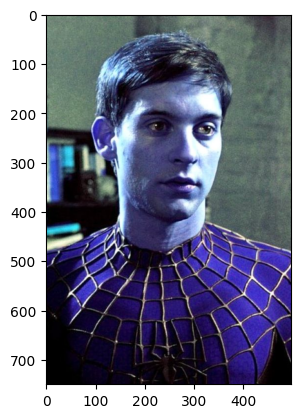

In [218]:
plt.imshow(img)

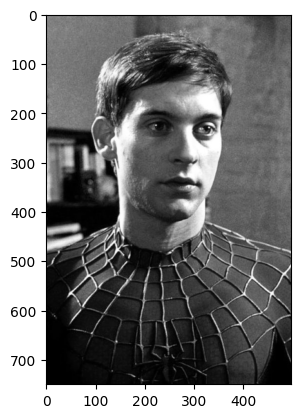

In [219]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

Detecting Position of Face in Images

In [220]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade= cv2.CascadeClassifier('D:\\VS Code\\marvel_celebrity_image_classification\\model\\opencv\\haarcascades\\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

#Returned Values of faces (x,y,width & height) from where face starts forming a rectangle

array([[157, 132, 251, 251]], dtype=int32)

In [221]:
(x,y,w,h) = faces[0]
print(x,y,w,h)

157 132 251 251


Plotting Red Rectangle around face in Image

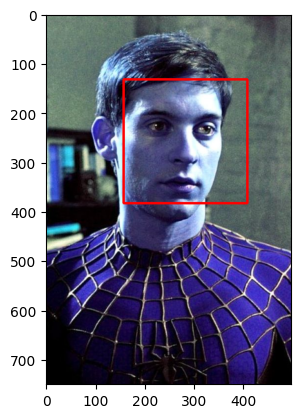

In [222]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(face_img)

cropped_img = img[y:y+h, x:x+w]
#plt.imshow(cropped_img)

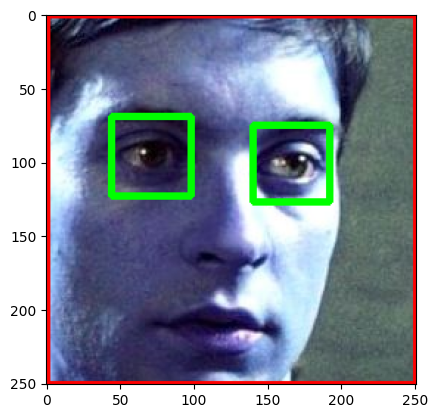

In [223]:
eyes = eye_cascade.detectMultiScale(gray,1.3,5)
for (ex,ey,ew,eh) in eyes:
    eye_img = cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
    
#plt.imshow(eye_img)
plt.imshow(cropped_img, cmap='gray')

#Funtion to return cropped Image

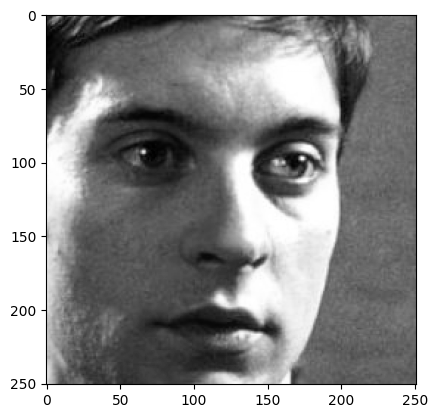

In [226]:
def crop_img(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    # Check if only one face is detected
    if len(faces) >= 1:
        x, y, w, h = faces[0]
        cropped_face = gray[y:y+h, x:x+w]
        # Detect eyes within the cropped face
        eyes = eye_cascade.detectMultiScale(cropped_face)
        # Check if exactly two eyes are detected
        if len(eyes) >= 2:
            return cropped_face      

#for (ex,ey,ew,eh) in eyes:
    #    eye_img = cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)
cropped_img = crop_img(r"D:\VS Code\marvel_celebrity_image_classification\model\Dataset\Spider Man - Toby Maguire\7.jpg")    
plt.imshow(cropped_img, cmap='gray')